In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#  1 Build Time Series

In [2]:
# Import TAVG, TAVG = Average temperature
tavg = pd.read_csv('ittsaip-data/NOAA_TAVG.csv')
tavg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 2 columns):
DATE    147 non-null int64
TAVG    147 non-null float64
dtypes: float64(1), int64(1)
memory usage: 2.4 KB


In [3]:
tavg.head()

,DATE,TAVG
0,1870,53.8
1,1871,51.3
2,1872,51.3
3,1873,50.9
4,1874,51.3


In [4]:
# Set date as index
tavg.set_index('DATE', inplace=True, drop=True)
tavg.index = pd.to_datetime(tavg.index, format='%Y')
tavg.head()

,TAVG
DATE,
1870-01-01,53.8
1871-01-01,51.3
1872-01-01,51.3
1873-01-01,50.9
1874-01-01,51.3


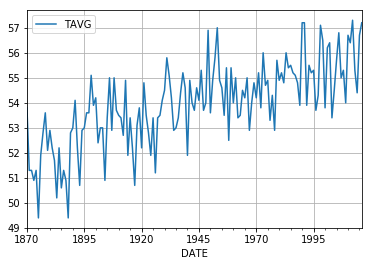

In [5]:
tavg.plot(grid=True)
plt.show()

In [6]:
# Select year 2000
tavg['2000']

,TAVG
DATE,
2000-01-01,53.8


In [7]:
# Broadcast percent change and difference columns
tavg = tavg.assign(percent_change=tavg['TAVG'].pct_change())
tavg = tavg.assign(difference=tavg['TAVG'].diff())
tavg.head()

,TAVG,percent_change,difference
DATE,,,
1870-01-01,53.8,NaN,NaN
1871-01-01,51.3,-0.046468,-2.5
1872-01-01,51.3,0.000000,0.0
1873-01-01,50.9,-0.007797,-0.4
1874-01-01,51.3,0.007859,0.4


In [8]:
# Autocorrelation
tavg['TAVG'].autocorr()

0.5705478431596491

In [9]:
# Time series with seasonality
hrb = pd.read_csv('ittsaip-data/HRB.csv', index_col='Quarter')
hrb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 2007Q1 to 2017Q4
Data columns (total 1 columns):
Earnings    44 non-null float64
dtypes: float64(1)
memory usage: 704.0+ bytes


In [10]:
hrb.head()

,Earnings
Quarter,
2007Q1,-0.36
2007Q2,-0.38
2007Q3,0.07
2007Q4,1.85
2008Q1,-0.34


In [11]:
dji = pd.read_csv('ittsaip-data/DJI.csv', index_col='Date')
dji.head()

,Value
Date,
1941,110.96
1942,119.40
1943,135.89
1944,152.32
1945,192.91


In [12]:
ufo = pd.read_csv('ittsaip-data/UFO.csv', index_col='Date')
ufo.head()

,Value
Date,
1941,1
1942,2
1943,9
1944,9
1945,9


## 1-02 Merging time series with different dates

In [13]:
# Import AMZN

# amzn = pd.read_csv('ittsaip-data/AMZN.csv')
# amzn.set_index('Date', inplace=True, drop=True)
# amzn.index = pd.to_datetime(amzn.index)

amzn = pd.read_csv('ittsaip-data/AMZN.csv', index_col='Date', parse_dates=['Date'])
amzn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5088 entries, 1997-05-15 to 2017-08-02
Data columns (total 1 columns):
Adj Close    5088 non-null float64
dtypes: float64(1)
memory usage: 79.5 KB


In [14]:
amzn.head()

,Adj Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083


In [15]:
# Import MSFT
msft = pd.read_csv('ittsaip-data/MSFT.csv', index_col='Date', parse_dates=['Date'])
msft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-08-06 to 2017-08-04
Data columns (total 1 columns):
Adj Close    1258 non-null float64
dtypes: float64(1)
memory usage: 19.7 KB


In [16]:
msft.head()

,Adj Close
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896
2012-08-09,26.587088
2012-08-10,26.517351


In [17]:
# Find dates in AMZN & MSFT
amzn_dates_set = set(amzn.index)
msft_dates_set = set(msft.index)

# Dates with AMZN but not MSFT
print('amzn - msft:', list(amzn_dates_set - msft_dates_set)[0:10])

amzn - msft: [Timestamp('2000-09-06 00:00:00'), Timestamp('2004-05-05 00:00:00'), Timestamp('2003-12-23 00:00:00'), Timestamp('2008-12-12 00:00:00'), Timestamp('2003-01-10 00:00:00'), Timestamp('2011-09-12 00:00:00'), Timestamp('2010-06-16 00:00:00'), Timestamp('2002-08-12 00:00:00'), Timestamp('2011-11-04 00:00:00'), Timestamp('1998-07-30 00:00:00')]


Join: https://stackoverflow.com/questions/26645515/pandas-join-issue-columns-overlap-but-no-suffix-specified

In [18]:
# amzn_msft = amzn.join(msft, how='inner')
# amzn_msft.info()

In [19]:
# Merging AMZN & MSFT
amzn_msft = pd.merge(amzn, msft, how='outer', left_index=True, right_index=True)
amzn_msft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5090 entries, 1997-05-15 to 2017-08-04
Data columns (total 2 columns):
Adj Close_x    5088 non-null float64
Adj Close_y    1258 non-null float64
dtypes: float64(2)
memory usage: 119.3 KB


In [20]:
amzn_msft.tail()

,Adj Close_x,Adj Close_y
Date,,
2017-07-31,987.780029,72.699997
2017-08-01,996.190002,72.580002
2017-08-02,995.890015,72.260002
2017-08-03,NaN,72.150002
2017-08-04,NaN,72.680000


In [21]:
amzn_msft.columns = ["amzn", "msft"]
amzn_msft.tail()

,amzn,msft
Date,,
2017-07-31,987.780029,72.699997
2017-08-01,996.190002,72.580002
2017-08-02,995.890015,72.260002
2017-08-03,NaN,72.150002
2017-08-04,NaN,72.680000


In [22]:
# Get percent change
amzn_msft_returns = amzn_msft.pct_change()
amzn_msft_returns.tail()

,amzn,msft
Date,,
2017-07-31,-0.031626,-0.004655
2017-08-01,0.008514,-0.001651
2017-08-02,-0.000301,-0.004409
2017-08-03,0.000000,-0.001522
2017-08-04,0.000000,0.007346


In [23]:
# Broadcast percent change
amzn_msft['amzn_pc'] = amzn_msft['amzn'].pct_change()
amzn_msft['msft_pc'] = amzn_msft['msft'].pct_change()
amzn_msft.tail()

,amzn,msft,amzn_pc,msft_pc
Date,,,,
2017-07-31,987.780029,72.699997,-0.031626,-0.004655
2017-08-01,996.190002,72.580002,0.008514,-0.001651
2017-08-02,995.890015,72.260002,-0.000301,-0.004409
2017-08-03,NaN,72.150002,0.000000,-0.001522
2017-08-04,NaN,72.680000,0.000000,0.007346


## 1-03 Correlation of stocks and bonds

Investors are often interested in the correlation between the returns of two different assets for asset allocation and hedging purposes. In this exercise, you'll try to answer the question of whether stocks are positively or negatively correlated with bonds. Scatter plots are also useful for visualizing the correlation between the two variables.

Keep in mind that you should compute the correlations on the percentage changes rather than the levels.

In [24]:
# Get correlation
amzn_msft['amzn_pc'].corr(amzn_msft['msft_pc'])

0.37785661363601447

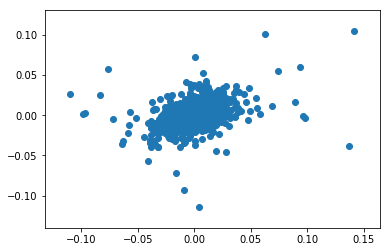

In [25]:
plt.scatter(amzn_msft['amzn_pc'], amzn_msft['msft_pc'])
plt.show()

Two trending series may show a strong correlation even if they are completely unrelated. This is referred to as "spurious correlation". That's why when you look at the correlation of say, two stocks, you should look at the correlation of their returns and not their levels.

## Regression

In [26]:
import statsmodels.api as sm

In [27]:
amzn_msft = sm.add_constant(amzn_msft)
amzn_msft.tail()

/home/anonymous/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,amzn,msft,amzn_pc,msft_pc
Date,,,,,
2017-07-31,1.0,987.780029,72.699997,-0.031626,-0.004655
2017-08-01,1.0,996.190002,72.580002,0.008514,-0.001651
2017-08-02,1.0,995.890015,72.260002,-0.000301,-0.004409
2017-08-03,1.0,NaN,72.150002,0.000000,-0.001522
2017-08-04,1.0,NaN,72.680000,0.000000,0.007346


In [28]:
amzn_msft = amzn_msft.dropna()
amzn_msft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2012-08-07 to 2017-08-02
Data columns (total 5 columns):
const      1255 non-null float64
amzn       1255 non-null float64
msft       1255 non-null float64
amzn_pc    1255 non-null float64
msft_pc    1255 non-null float64
dtypes: float64(5)
memory usage: 58.8 KB


In [29]:
amzn_msft.head()

,const,amzn,msft,amzn_pc,msft_pc
Date,,,,,
2012-08-07,1.0,236.559998,26.377876,0.010983,0.010350
2012-08-08,1.0,234.380005,26.438896,-0.009215,0.002313
2012-08-09,1.0,234.059998,26.587088,-0.001365,0.005605
2012-08-10,1.0,232.750000,26.517351,-0.005597,-0.002623
2012-08-13,1.0,232.440002,26.491201,-0.001332,-0.000986


R-squared measures how closely the data fit the regression line, so the R-squared in a simple regression is related to the correlation between the two variables. In particular, the magnitude of the correlation is the square root of the R-squared and the sign of the correlation is the sign of the regression coefficient.

In [30]:
results = sm.OLS(amzn_msft['msft_pc'], amzn_msft[['const','amzn_pc']]).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                msft_pc   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     208.8
Date:                Sun, 14 Apr 2019   Prob (F-statistic):           6.99e-44
Time:                        16:52:54   Log-Likelihood:                 3656.5
No. Observations:                1255   AIC:                            -7309.
Df Residuals:                    1253   BIC:                            -7299.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.410      0.1

## 1-06 Autocorrelation

One puzzling anomaly with stocks is that investors tend to overreact to news. Following large jumps, either up or down, stock prices tend to reverse. This is described as mean reversion in stock prices: prices tend to bounce back, or revert, towards previous levels after large moves, which are observed over time horizons of about a week. A more mathematical way to describe mean reversion is to say that stock returns are negatively autocorrelated.

This simple idea is actually the basis for a popular hedge fund strategy. If you're curious to learn more about this hedge fund strategy (although it's not necessary reading for anything else later in the course), see here.

You'll look at the autocorrelation of weekly returns of MSFT stock from 2012 to 2017. You'll start with a DataFrame MSFT of daily prices. You should use the .resample() method to get weekly prices and then compute returns from prices. Use the pandas method .autocorr() to get the autocorrelation and show that the autocorrelation is negative. Note that the .autocorr() method only works on Series, not DataFrames (even DataFrames with one column), so you will have to select the column in the DataFrame.

In [31]:
# ACF of daily change in msft price
msft_daily = msft.copy()
msft_daily['change_rate'] = msft.pct_change()
print('The autocorrelation of daily interest rate changes is %4.2f' %(msft_daily['change_rate'].autocorr()))

The autocorrelation of daily interest rate changes is 0.02


In [32]:
msft_annual = msft.copy().resample(rule='A').last()
msft_annual['change_rate'] = msft_annual.pct_change()
print('The autocorrelation of annual price changes is %4.2f' %(msft_annual['change_rate'].autocorr()))

The autocorrelation of annual price changes is 0.85


In [33]:
msft_week = msft.copy().resample(rule='w').last()
msft_returns = msft_week.pct_change()
print("The autocorrelation of weekly msft returns is %4.2f" %(msft_returns['Adj Close'].autocorr()))

The autocorrelation of weekly msft returns is -0.16


## 1-07 Are Interest Rates Autocorrelated?

When you look at daily changes in interest rates, the autocorrelation is close to zero. However, if you resample the data and look at annual changes, the autocorrelation is negative. This implies that while short term changes in interest rates may be uncorrelated, long term changes in interest rates are negatively autocorrelated. A daily move up or down in interest rates is unlikely to tell you anything about interest rates tomorrow, but a move in interest rates over a year can tell you something about where interest rates are going over the next year. And this makes some economic sense: over long horizons, when interest rates go up, the economy tends to slow down, which consequently causes interest rates to fall, and vice versa.

In [34]:
# # Compute the daily change in ingterest rates
# daily_data['change_rates'] = daily_data.diff()

# # Compute and print the autocorrelation of daily changes
# autocorrelation_daily = daily_data['change_rates'].autocorr()
# print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

# # Convert the daily data to annual data
# annual_data = daily_data['US10Y'].resample(rule='A', how='last')

# # Repeat above for annual data
# annual_data['diff_rates'] = annual_data.diff()
# autocorrelation_annual = annual_data['diff_rates'].autocorr()
# print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_annual))

# 2 Autocorrelation function (ACF)

In [35]:
from statsmodels.graphics.tsaplots import plot_acf

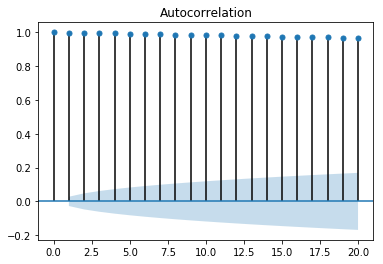

In [36]:
plot_acf(amzn, lags=20, alpha=0.05)
plt.show()

In [37]:
from statsmodels.tsa.stattools import acf

In [38]:
print(acf(amzn))

[1.         0.99832485 0.99664308 0.9949939  0.99325458 0.99143868
 0.98959781 0.98780755 0.98602265 0.98428051 0.98251203 0.98075127
 0.97898956 0.97729077 0.97561777 0.97395206 0.97227474 0.97062829
 0.9689624  0.96734192 0.96575617 0.96413962 0.96259378 0.96100578
 0.95936772 0.95766635 0.95599855 0.95428846 0.95254723 0.95081599
 0.94911487 0.94745289 0.94579533 0.94415015 0.9425648  0.94092076
 0.93924806 0.93762196 0.93596238 0.93420978 0.9324679 ]


## 2-01

You will compute the array of autocorrelations for the H&R Block quarterly earnings that is pre-loaded in the DataFrame HRB. Then, plot the autocorrelation function using the plot_acf module. This plot shows what the autocorrelation function looks like for cyclical earnings data. The ACF at lag=0 is always one, of course. In the next exercise, you will learn about the confidence interval for the ACF, but for now, supress the confidence interval by setting alpha=1.

In [39]:
# Compute the acf array of HRB
hrb_array = acf(hrb)
print(hrb_array)

[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259  -0.08758288
 -0.24075584 -0.20363054  0.4797058  -0.06091139 -0.20935484 -0.18303202
  0.42481275 -0.03352559 -0.17471087 -0.16384328  0.34341079 -0.01734364
 -0.13820811 -0.12232172  0.28407164 -0.01927656 -0.11757974 -0.10386933
  0.20156485 -0.0120634  -0.07509539 -0.0707104   0.10222029]


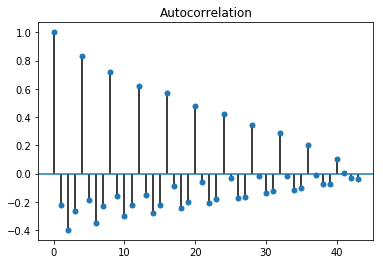

In [40]:
# Plot the acf function
# alpha=1 supress the CI
plot_acf(hrb, alpha=1)
plt.show()

## 2-02 Stock is Mean Reverting?

You saw that the autocorelation of MSFT's weekly stock returns was -0.16. That autocorrelation seems large, but is it statistically significant? In other words, can you say that there is less than a 5% chance that we would observe such a large negative autocorrelation if the true autocorrelation were really zero? And are there any autocorrelations at other lags that are significantly different from zero?

Even if the true autocorrelations were zero at all lags, in a finite sample of returns you won't see the estimate of the autocorrelations exactly zero.

For example, the standard deviation of the ACF is 0.1, and since 95% of a normal curve is between +1.96 and -1.96 standard deviations from the mean, the 95% confidence interval is
$\pm\frac{1.96}{\sqrt{N}}$


This approximation only holds when the true autocorrelations are all zero.

You will compute the actual and approximate confidence interval for the ACF, and compare it to the lag-one autocorrelation of -0.16 from the last chapter.

In [41]:
# Compute and print the autocorrelation of MSFT weekly returns
msft_autocorrelation = msft_returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(msft_autocorrelation))

The autocorrelation of weekly MSFT returns is -0.16


In [42]:
# Find the number of observations
msft_nobs = len(msft_returns)
msft_nobs

261

In [43]:
# Compute the approximate confidence interval
msft_conf = 1.96/(msft_nobs**0.5)
print("The approximate confidence interval is +/- %4.2f" %(msft_conf))

The approximate confidence interval is +/- 0.12


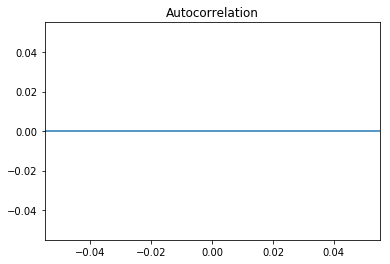

In [44]:
# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(msft_returns, alpha=0.05, lags=20)
plt.show()

## 2-03 White noise
A white noise time series is simply a sequence of uncorrelated random variables that are identically distributed. Stock returns are often modelled as white noise. Unfortunately, for white noise, we cannot forecast future observations based on the past - autocorrelations at all lags are zero

In [45]:
import numpy as np

In [46]:
# Simulate wite noise returns
wn_returns = np.random.normal(loc=0.02, scale=0.05, size=1000)
wn_returns[:5]

array([0.01973855, 0.02703822, 0.04076252, 0.03903972, 0.05456163])

In [47]:
# Print out the mean and standard deviation of wn_returns
mean = np.mean(wn_returns)
std = np.std(wn_returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

The mean is 0.020 and the standard deviation is 0.050


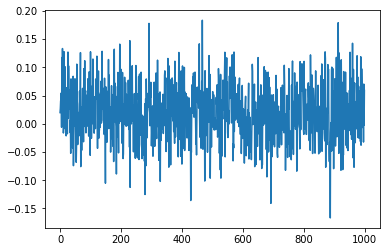

In [48]:
# Plot returns series
plt.plot(wn_returns)
plt.show()

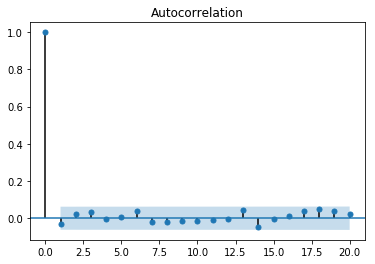

In [49]:
# Plot autocorrelation function of white noise returns
plot_acf(wn_returns, lags=20)
plt.show()

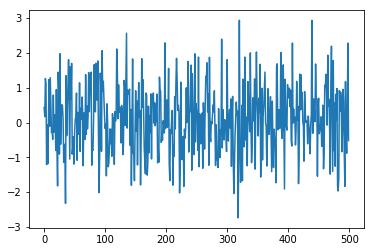

In [50]:
# Sample white noise
noise = np.random.normal(loc=0, scale=1, size=500)
plt.plot(noise)
plt.show()

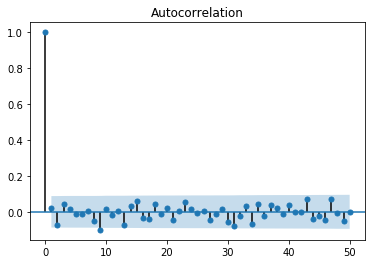

In [51]:
plot_acf(noise, lags=50)
plt.show()

## 2-04 Random Walk

Whereas stock returns are often modelled as white noise, stock prices closely follow a random walk. In other words, today's price is yesterday's price plus some random noise.

In [52]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

In [53]:
# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100, noise additive
P = 100 + np.cumsum(steps)

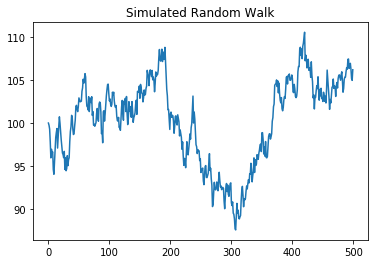

In [54]:
# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

## 2-05 Random walk with drift

You will look at a random walk with a drift. Many time series, like stock prices, are random walks but tend to drift up over time. You will make the noise multiplicative: you will add one to the random, normal changes to get a total return, and multiply that by the last price.

In [55]:
# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1

In [56]:
# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

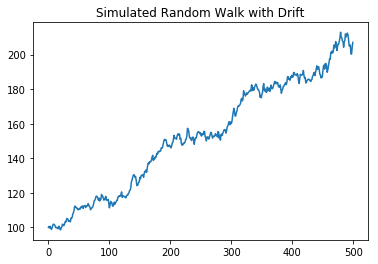

In [57]:
# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

## 2-06 Augmented Dickey-Fuller (ADF) test

Most stock prices follow a random walk (perhaps with a drift). You will look at a time series of Amazon stock prices, pre-loaded in the DataFrame AMZN, and run the 'Augmented Dickey-Fuller Test' from the statsmodels library to show that it does indeed follow a random walk.

With the ADF test, the "null hypothesis" (the hypothesis that we either reject or fail to reject) is that the series follows a random walk. Therefore, a low p-value (say less than 5%) means we can reject the null hypothesis that the series is a random walk.

In [58]:
from statsmodels.tsa.stattools import adfuller

In [59]:
# Run the ADF test on the price series and print out the results
results = adfuller(amzn['Adj Close'])
print(results)

(4.025168525770742, 1.0, 33, 5054, {'1%': -3.4316445438146865, '5%': -2.862112049726916, '10%': -2.5670745025321304}, 30308.64216426981)


In [60]:
# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

The p-value of the test on prices is: 1.0


## 2-07

You showed that Amazon stock prices, contained in the DataFrame AMZN follow a random walk. In this exercise. you will do the same thing for Amazon returns (percent change in prices) and show that the returns do not follow a random walk.

In [61]:
# Create a DataFrame of AMZN returns
amzn_returns = amzn.pct_change()

# Eliminate the NaN in the first row of returns
amzn_returns = amzn_returns.dropna()

amzn_returns.head()

,Adj Close
Date,
1997-05-16,-0.117021
1997-05-19,-0.012049
1997-05-20,-0.042683
1997-05-21,-0.127389
1997-05-22,-0.021898


In [62]:
# Run the ADF test on the return series and print out the p-value
results = adfuller(amzn_returns['Adj Close'])
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 2.565589808348563e-22


## 2-08 Seasonal Adjustment During Tax Season

Many time series exhibit strong seasonal behavior. The procedure for removing the seasonal component of a time series is called seasonal adjustment. For example, most economic data published by the government is seasonally adjusted.

You saw earlier that by taking first differences of a random walk, you get a stationary white noise process. For seasonal adjustments, instead of taking first differences, you will take differences with a lag corresponding to the periodicity.

Look again at the ACF of H&R Block's quarterly earnings, pre-loaded in the DataFrame HRB, and there is a clear seasonal component. The autocorrelation is high for lags 4,8,12,16,..., because of the spike in earnings every four quarters during tax season. Apply a seasonal adjustment by taking the fourth difference (four represents the periodicity of the series). Then compute the autocorrelation of the transformed series.

In [63]:
# Seasonally adjust quarterly earnings
hrbsa = hrb.diff(4)

# Print the first 10 rows of the seasonally adjusted series
hrbsa.head(10)

,Earnings
Quarter,
2007Q1,NaN
2007Q2,NaN
2007Q3,NaN
2007Q4,NaN
2008Q1,0.02
2008Q2,-0.04
2008Q3,-0.05
2008Q4,0.26
2009Q1,-0.05


In [64]:
# Drop the NaN data
hrbsa.dropna(inplace=True)

hrbsa.head()

,Earnings
Quarter,
2008Q1,0.02
2008Q2,-0.04
2008Q3,-0.05
2008Q4,0.26
2009Q1,-0.05


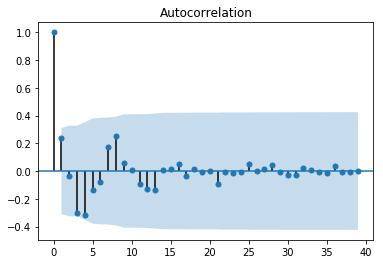

In [65]:
# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(hrbsa)
plt.show()

## Stationary

- Strong stationarity = entire distribution of data is time-invariant
- Weak stationarity = mean, variance & autocorrelation are time-invariant

### Transform nonstationary to stationary series

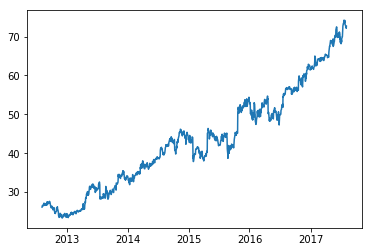

In [66]:
# Random walk
plt.plot(msft)
plt.show()

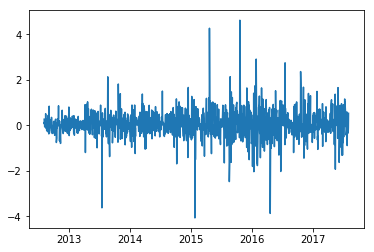

In [67]:
# 1st diff
plt.plot(msft.diff())
plt.show()

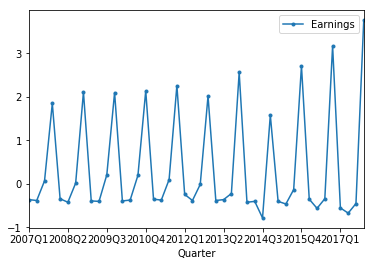

In [68]:
hrb.plot(style='.-')
plt.show()

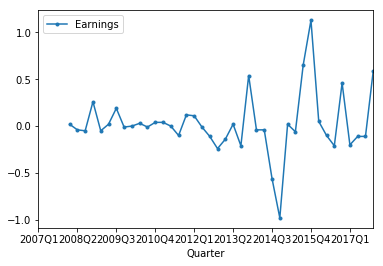

In [69]:
# Seasonal diff
hrb.diff(4).plot(style='.-')
plt.show()

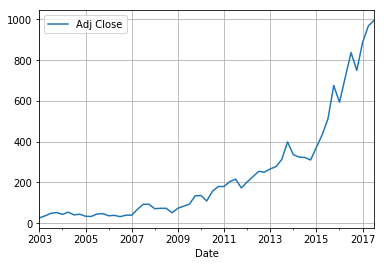

In [70]:
# AMZN quarterly revenues
amzn_quarter = amzn.resample(rule='Q').last()
amzn_quarter['2003':].plot(grid=True)
plt.show()

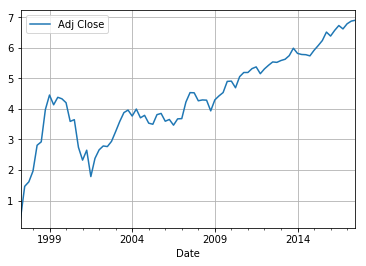

In [71]:
# Log of AMZN revenues
np.log(amzn_quarter).plot(grid=True)
plt.show()

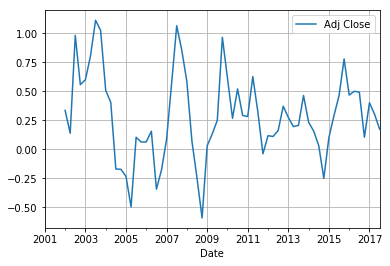

In [72]:
# Log, then seasonal difference
np.log(amzn_quarter['2001':]).diff(4).plot(grid=True)
plt.show()

# 3 Introducing an AR model

## AR(1) model
$R_t = \mu + \phi R_{t-1} + \epsilon_t$
- AR parameter: $\phi$
- Stationary: $-1 < \phi < 1$
- $-\phi$: Mean reversion, ACF plot will alternate between extreme ends
- $+\phi$: Momentum, ACF plot will decrease slowly

## 3-01 Stimulating AR process

When inputting the coefficients, you must include the 0-lag coefficient of 1, and the sign of the other coefficient is opposite of what we have been using.

For eg, AR(1) process with $\phi=0.9$, the array representing the AR parameters would be $ar=np.array([1,0.9])$

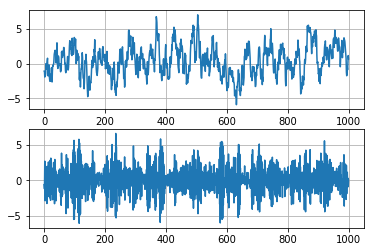

In [73]:
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data1)
plt.grid(True)

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data2)
plt.grid(True)

## 3-02 Compare ACF for several AR time series

The autocorrelation function decays exponentially for an AR time series at a rate of the AR parameter.

For eg, if AR parameter $\phi=0.9$, the first-lag autocorrelation will be 0.9, the second-lag will be $(0.9)2=0.81$, etc

A smaller AR parameter will have a steeper decay. And for a negative AR parameter, the decay will flip signs

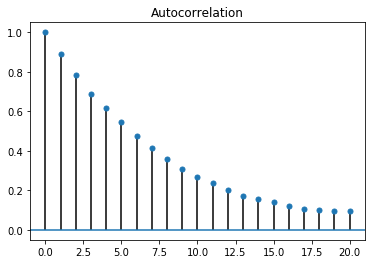

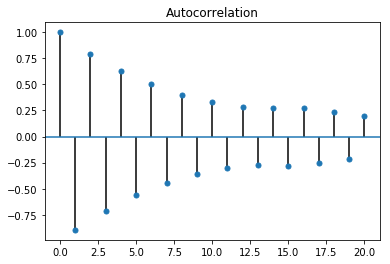

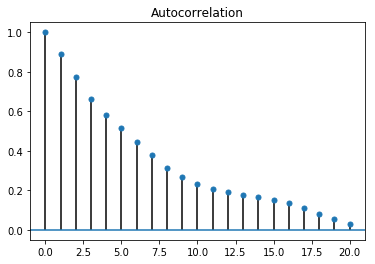

In [74]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data1, alpha=1, lags=20)
plt.show()

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data2, alpha=1, lags=20)
plt.show()

# Plot 3: AR parameter = +0.3
ar3 = np.array([1, -0.9])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data3 = AR_object3.generate_sample(nsample=1000)

plot_acf(simulated_data3, alpha=1, lags=20)
plt.show()

## 3-03 Estimating an AR model

In [75]:
from statsmodels.tsa.arima_model import ARMA

# Fit AR(1) model
mod = ARMA(simulated_data1, order=(1,0))
res = mod.fit()

/home/anonymous/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/anonymous/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/anonymous/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future th

In [76]:
print(res.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1405.951
Method:                       css-mle   S.D. of innovations              0.986
Date:                Sun, 14 Apr 2019   AIC                           2817.902
Time:                        16:52:58   BIC                           2832.625
Sample:                             0   HQIC                          2823.498
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3967      0.276      1.439      0.150      -0.144       0.937
ar.L1.y        0.8877      0.014     61.395      0.000       0.859       0.916
                                    Roots           

true $\mu=0$ and $\phi=0.9$

In [77]:
# Print out the est. for the constant and for the phi
print("When the true phi=0.9, the estimate of constant (and the phi) are:")
print(res.params)

When the true phi=0.9, the estimate of constant (and the phi) are:
[0.39673213 0.88774844]


## 3-04 Forecasting an AR model

You can also do forecasting, both in-sample and out-sample using statsmodels. The in-sample is a forecast of the next data point using the data up to that point, and the out-of-sample forecasts any number of data points in the future.

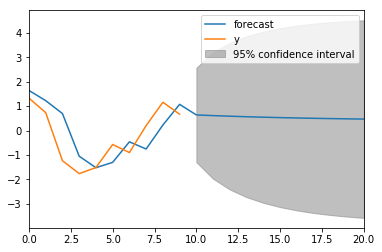

In [78]:
from statsmodels.tsa.arima_model import ARMA

mod = ARMA(simulated_data1, order=(1,0))
res = mod.fit()

# Start the forecast 10 data points before the end of the 1000 point series at 990, 
# and end the forecast 10 data points after the end of the series at point 1010
res.plot_predict(start=990, end=1010)
plt.show()

## 3-06 Compare AR model with random walk

Sometimes it is difficult to distinguish between a time series that is slightly mean reverting and a time series that does not mean revert at all, like a random walk. You will comapre the ACF for the data with a simulated random walk with the same number of observations.

You will notice that their autocorrelations are very similar.

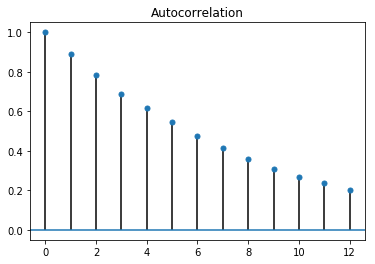

In [79]:
# Plot the autocorrelation of the simulated random walk series
plot_acf(simulated_data1, alpha=1, lags=12)
plt.show()

## Choosing the right model

Techniques to deteremine order of an AR model:
- Partial autocorrelation function (PACF)
- Information criteria

## 3-07 PACF

In [80]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

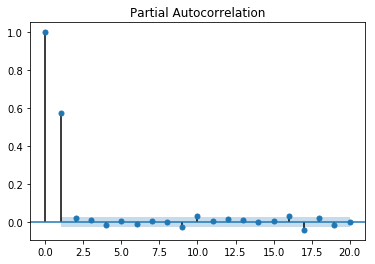

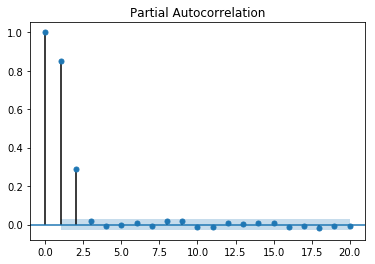

In [81]:
# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

## 3-08 Information criteria
Compute the goodness of fit with the estimated parameters, but apply a penalty function on the number of parameters.

Popular measures:
- AIC (Akaike information criterion)
- BIC (Bayesian information criterion)

Choose order p with lowest BIC

In [82]:
# AIC
res.aic

2817.9018867740047

In [83]:
# BIC
res.bic

2832.625152610951

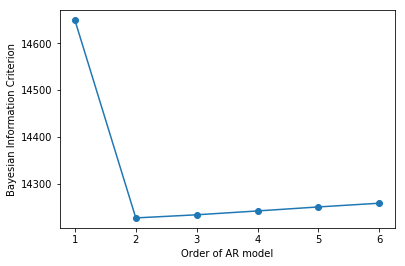

In [84]:
# Fit the data to an AR(p) for p = 0, ..., 6 and save the BIC
BIC = np.zeros(7)

for p in range(7):
    mod = ARMA(simulated_data_2, order=(p,0))
    res = mod.fit()
    
    # Save BIC for AR(p)
    BIC[p] = res.bic

# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

# 4 Describe model

## MA(1) model

$R_t=\mu+\epsilon_t1-\theta\epsilon_{t-1}$
- MA parameter: $\theta$
- Stationary for all values of $\theta$
- $-\theta$: 1 period mean reversion
- $+\theta$: 1 period momentum
- 1 period autocorrelation is $\frac{\theta}{1+\theta^2}$

MA(2) model:
$R_t=\mu+\epsilon_t1-\theta_1\epsilon_{t-1}-\theta_2\epsilon_{t-2}$

In [85]:
from statsmodels.tsa.arima_process import ArmaProcess

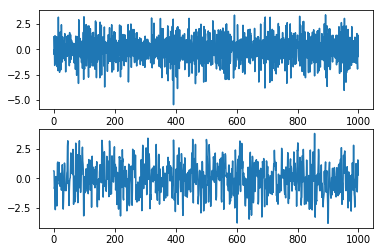

In [86]:
# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

plt.show()

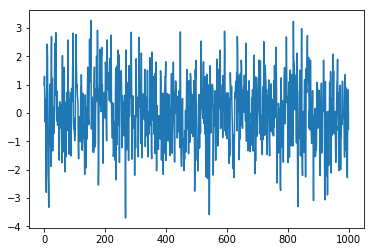

In [87]:
ar = np.array([1])
ma = np.array([1, 0.5])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=1000)
plt.plot(simulated_data)
plt.show()

## 4-02 Compute ACF for several MA time series

An MA(1) model has no autocorrelation beyond lag 1, an MA(2) model has no autocorrelation beyond lag 2.

For example if the MA parameter, $\theta=+0.9$, first-lag autocorrelation will be $\frac{0.9}{1+(0.9)2}=0.497$, the autocorrelation at all other lags will be 0.

In [88]:
from statsmodels.graphics.tsaplots import plot_acf

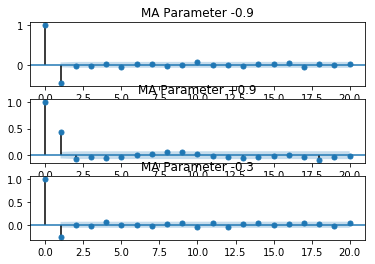

In [89]:
fig, axes = plt.subplots(3,1)

# Plot 1: MA parameter = -0.9
plot_acf(simulated_data_1, lags=20, ax=axes[0])
axes[0].set_title("MA Parameter -0.9")

# Plot 2: MA parameter = +0.9
plot_acf(simulated_data_2, lags=20, ax=axes[1])
axes[1].set_title("MA Parameter +0.9")

# Plot 3: MA parameter = -0.3
ar3 = np.array([1])
ma3 = np.array([1, -0.3])
MA_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = MA_object3.generate_sample(nsample=1000)
plot_acf(simulated_data_3, lags=20, ax=axes[2])
axes[2].set_title("MA Parameter -0.3")
plt.show()

## ARMA model

ARMA(1,1) model:
$R_t=\mu+\phi R_{t-1}+\epsilon_t+\theta\epsilon_{t-1}$

## 4-03 Estimating an MA model

In [90]:
from statsmodels.tsa.arima_model import ARMA

In [91]:
# Fit an MA(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta (and the consant) are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1431.913
Method:                       css-mle   S.D. of innovations              1.012
Date:                Sun, 14 Apr 2019   AIC                           2869.826
Time:                        16:53:01   BIC                           2884.550
Sample:                             0   HQIC                          2875.422
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.003      0.543      0.587      -0.005       0.008
ma.L1.y       -0.9005      0.012    -74.247      0.000      -0.924      -0.877
                                    Roots           

## 4-04 Forecasting an MA model

One big difference you will see between out-of-sample forecasts with an MA(1) model and an AR(1) model is that the MA(1) forecasts more than 1 period in the future are simply the mean of the sample

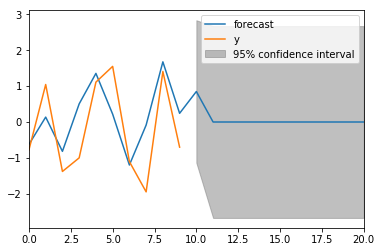

In [92]:
# Forecast the first MA(1) model
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

## 4-05 High frequency stock prices 

Higher frequency stock data is well modelled by an MA(1) process.

The DataFrame sprint contains one day's prices (on September 1, 2017) for Sprint stock (ticker symbol "S") sampled at a frequency of one minute. The stock market is open for 6.5 hours (390 minutes), from 9:30am to 4:00pm.

First, there are no column headers.The data is not time stamped from 9:30 to 4:00, but rather goes from 0 to 390. And you will notice that the first date is the odd-looking "a1504272600". The number after the "a" is Unix time which is the number of seconds since January 1, 1970. This is how this dataset separates each day of sprint data.

If you look at the data types, you'll notice that the DATE column is an object, which here means a string. You will need to change that to numeric before you can clean up some missing data.

In [93]:
import datetime

In [94]:
sprint = pd.read_csv('ittsaip-data/Sprint_Intraday.txt', header=None)
sprint

,0,1,2,3,4,5
0,a1504272600,8.2900,8.3000,8.2900,8.3000,32407
1,1,8.2700,8.3000,8.2500,8.2900,28467
2,2,8.2800,8.2800,8.2800,8.2800,1500
3,3,8.2750,8.2800,8.2701,8.2800,5200
4,4,8.2875,8.2875,8.2800,8.2800,2900
5,5,8.2800,8.2876,8.2800,8.2850,8400
6,6,8.2600,8.2700,8.2600,8.2700,7671
7,7,8.2590,8.2599,8.2550,8.2599,11700
8,8,8.2563,8.2563,8.2563,8.2563,7890
9,9,8.2550,8.2600,8.2500,8.2550,31140


In [95]:
sprint.columns = ['Date', 'Open', 'High', 'Low', 'Close Last', 'Volume']
sprint.columns

Index(['Date', 'Open', 'High', 'Low', 'Close Last', 'Volume'], dtype='object')

In [96]:
# Change the first date to zero
sprint.iloc[0,0] = 0

# Convert date column to numeric
sprint['Date'] = pd.to_numeric(sprint['Date'])

# Make the date column the new index
sprint = sprint.set_index('Date')

sprint.head()

,Open,High,Low,Close Last,Volume
Date,,,,,
0,8.2900,8.3000,8.2900,8.30,32407
1,8.2700,8.3000,8.2500,8.29,28467
2,8.2800,8.2800,8.2800,8.28,1500
3,8.2750,8.2800,8.2701,8.28,5200
4,8.2875,8.2875,8.2800,8.28,2900


## 4-06 More data cleanup: missing data

You will notice that a few rows are missing. There will be missing data if there are no trades in a particular 1-min interval. 1 way to see which rows are missing is to take the difference of 2 sets: the full set of every min and the set of the dataframe index which contains missing rows. You can fill in the missing rows with the `.reindex()` method, convert the index to time of day, and then plot the data.

Stocks trade at discrete 1-cent increments rather than at continuous prices, and when you plot the data you should observe that there are long periods when the stock bounces back and forth over 1 cent range. This is sometimes referred to as "bid/ask" bounce.

The length of the dataframe is: 389
Missing rows: {182, 14}


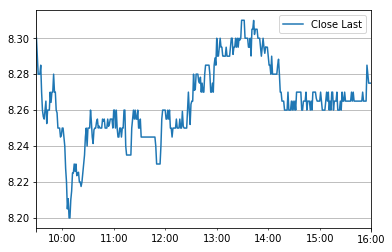

In [97]:
# Notice that some rows are missing
print("The length of the dataframe is:", len(sprint))

# Find the missing rows
print('Missing rows:', set(range(391)) - set(sprint.index))

# Fill in the missing rows
sprint = sprint.reindex(range(391), method='ffill')

# Change the index to the intraday times
sprint.index = pd.date_range(start='2017-08-28 9:30', end='2017-08-28 16:00', freq='1min')

# Plot the intraday time series
sprint[['Close Last']].plot(grid=True)
plt.show()

## 4-07 Applying an MA model

The bouncing of the stock price between bid and ask induces a negative 1st order autocorrelation, but no autocorrelations at lags higher than 1. You get the same ACF pattern with an MA(1) model. Therefore, you will fit an MA(1) model to the sprint stock data from the last exercise.

The 1st step is to compute minute-by-minute returns from the prices in sprint, and plot the autocorrelation function.

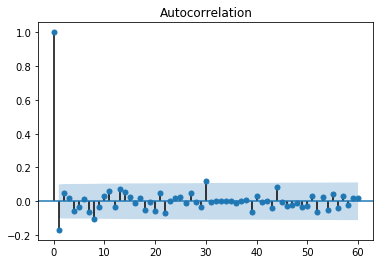

const              -0.000007
ma.L1.Close Last   -0.158710
dtype: float64


In [98]:
# Compute returns from prices and drop the NaN
returns = sprint.pct_change()
returns = returns.dropna()
returns

# Plot the ACF of returns with lags up to 60 mins
plot_acf(returns[['Close Last']], lags=60)
plt.show()

# Fit the data to an MA(1) model
mod = ARMA(returns[['Close Last']], order=(0,1))
res = mod.fit()
print(res.params)

## 4-08 Equivalence of AR(1) and MA(infinity)

AR(1) model = MA(infinity) model with appropriate parameters.

In [99]:
# Build a list MA parameters
ma = [0.8**i for i in range(30)]
print(ma)

[1.0, 0.8, 0.6400000000000001, 0.5120000000000001, 0.4096000000000001, 0.3276800000000001, 0.2621440000000001, 0.20971520000000007, 0.1677721600000001, 0.13421772800000006, 0.10737418240000006, 0.08589934592000005, 0.06871947673600004, 0.054975581388800036, 0.043980465111040035, 0.03518437208883203, 0.028147497671065624, 0.022517998136852502, 0.018014398509482003, 0.014411518807585602, 0.011529215046068483, 0.009223372036854787, 0.00737869762948383, 0.005902958103587064, 0.004722366482869652, 0.0037778931862957215, 0.0030223145490365774, 0.002417851639229262, 0.0019342813113834097, 0.0015474250491067279]


In [100]:
# Simulate the MA(30) model
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)
simulated_data

/home/anonymous/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


array([-0.99959111, -1.36755365, -0.24064863, ..., -1.54903674,
       -0.95167173,  0.72301152])

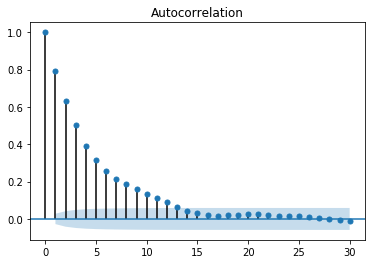

In [101]:
# Plot the ACF
plot_acf(simulated_data, lags=30)
plt.show()

# 5 Cointegration models

2 series $P_t$ and $Q_t$ can be random walk, but if the linear combination $P_t-cQ_t$ is not random walk, $P_t$ and $Q_t$ are cointegrated

2 steps to test for cointegration:
- Regress $P_t$ on $Q_t$ and get slope c
- Run ADF test on $P_t-cQ_t$ to test for random walk
- Use statsmodels `coint` function that combines both steps

## 5-01

The heating oil and natural gas prices are loaded in HO & NG dataframe, which look like random walk. Then plot the difference between the 2 series, which should look more like a mean reverting series (to put the 2 series in the same units, we multiply the heating oil prices, in \$/gallon, by 7.25, which converts it to \$/millionBTU, which is the same units as natural gas).

In [102]:
from statsmodels.tsa.stattools import coint

In [103]:
HO = pd.read_csv('ittsaip-data/CME_HO1.csv', index_col='Date', parse_dates=['Date'])
HO.head()

,Close
Date,
2005-12-30,1.7280
2005-12-29,1.7030
2005-12-28,1.6825
2005-12-27,1.6370
2005-12-23,1.7053


In [104]:
NG = pd.read_csv('ittsaip-data/CME_NG1.csv', index_col='Date', parse_dates=['Date'])
NG.head()

,Close
Date,
2005-12-30,11.225
2005-12-29,11.223
2005-12-28,11.431
2005-12-27,11.022
2005-12-23,12.283


In [105]:
len(HO), len(NG)

(3754, 3754)

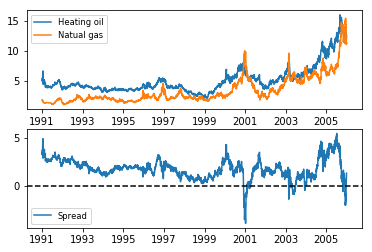

In [106]:
# Plot the prices separately
plt.subplot(2,1,1)
plt.plot(7.25*HO, label='Heating oil')
plt.plot(NG, label='Natual gas')
plt.legend(loc='best', fontsize='small')

# Plot the spread
plt.subplot(2,1,2)
plt.plot(7.25*HO-NG, label='Spread')
plt.legend(loc='best', fontsize='small')
plt.axhline(y=0, linestyle='--', color='k')
plt.show()

## 5-02

To verify that HO & NG are cointegrated, 1st apply ACF test to 2 separately to show they are random walks. Then apply the test to the difference, which should strongly reject the random walk hypothesis.

In [107]:
# Compute the ADF for HO and NG
result_HO = adfuller(HO['Close'])
print("The p-value for the ADF test on HO is ", result_HO[1])
result_NG = adfuller(NG['Close'])
print("The p-value for the ADF test on NG is ", result_NG[1])

# Compute the ADF of the spread
result_spread = adfuller(7.25*HO['Close'] - NG['Close'])
print("The p-value for the ADF test on the spread ", result_spread[1])

The p-value for the ADF test on HO is  0.019831028071626566
The p-value for the ADF test on NG is  0.0045472849565425045
The p-value for the ADF test on the spread  0.00011887051827352973


## 5-03

Cointegration involves two steps: regressing one time series on the other to get the cointegration vector, and then perform an ADF test on the residuals of the regression.

You will regress the value of one crytocurrency, bitcoin (BTC), on another cryptocurrency, ethereum (ETH). If we call the regression coeffiecient `b`, then the cointegration vector is simply `(1,−b)`. Then perform the ADF test on BTC `−b` ETH.

In [108]:
# Import the statsmodels module for regression and the adfuller function
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [109]:
# # Regress BTC on ETH
# ETH = sm.add_constant(ETH)
# result = sm.OLS(BTC, ETH).fit()

# # Compute ADF
# b = result.params[1]
# adf_stats = adfuller(BTC['Price'] - b*ETH['Price'])
# print("The p-value for the ADF test is ", adf_stats[1])
# # The data suggests that Bitcoin & Ethereum are cointegrated

## 5-04

An ARMA model is a simplistic approach to forecasting climate changes

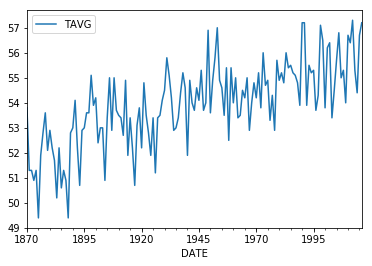

The p-value for the ADF test is 0.5832938987871106


In [110]:
temp_NY = tavg[['TAVG']].copy()

# Convert the index to a datetime object
temp_NY.index = pd.to_datetime(temp_NY.index, format='%Y')

# Plot average temperature
temp_NY.plot()
plt.show()

# Compute and print ADF p-value
result = adfuller(temp_NY['TAVG'])
print("The p-value for the ADF test is", result[1])

## 5-05

Since the temperature series, temp_NY, is a random walk with drift, take first differences to make it stationary. Then compute the sample ACF and PACF. This will provide some guidance on the order of the model.

In [111]:
# Take first difference of the temperature Series
chg_temp = temp_NY.diff()
chg_temp = chg_temp.dropna()
chg_temp.head()

,TAVG
DATE,
1871-01-01,-2.5
1872-01-01,0.0
1873-01-01,-0.4
1874-01-01,0.4
1875-01-01,-1.9


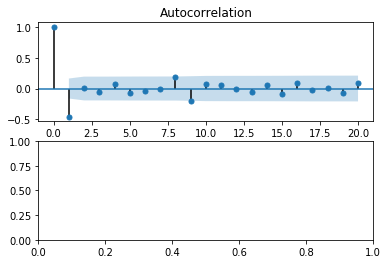

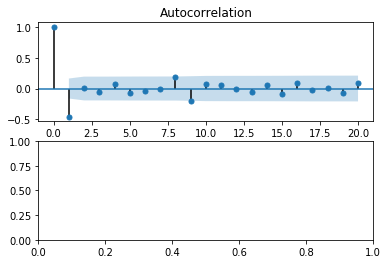

In [112]:
# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

## 5-06 Which ARMA Model is Best?

Fit the temperature data to an AR(1), AR(2), MA(1), and ARMA(1,1) and see which model is the best fit, using the AIC criterion.

In [113]:
# Fit the data to an AR(1) model and print AIC:
mod = ARMA(chg_temp, order=(1,0))
res = mod.fit()
print("The AIC for an AR(1) is: ", res.aic)

# Fit the data to an AR(2) model and print AIC:
mod = ARMA(chg_temp, order=(2,0))
res = mod.fit()
print("The AIC for an AR(2) is: ", res.aic)

# Fit the data to an MA(1) model and print AIC:
mod = ARMA(chg_temp, order=(0,1))
res = mod.fit()
print("The AIC for an MA(1) is: ", res.aic)

/home/anonymous/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/home/anonymous/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/home/anonymous/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/anonymous/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional i

The AIC for an AR(1) is:  510.5346898313911
The AIC for an AR(2) is:  501.9274123160228
The AIC for an MA(1) is:  469.3909693438297


## 5-07

Finally, you will forecast the temperature over the next 30 years using an ARMA(1,1) model, including confidence bands around that estimate. Keep in mind that the estimate of the drift will have a much bigger impact on long range forecasts than the ARMA parameters.

Earlier, you determined that the temperature data follows a random walk and you looked at first differencing the data. You will use the ARIMA module on the temperature data, pre-loaded in the DataFrame temp_NY, but the forecast would be the same as using the ARMA module on changes in temperature, and then using cumulative sums of these changes to get the temperature.

In [114]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima_model import ARIMA

/home/anonymous/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/home/anonymous/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/home/anonymous/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


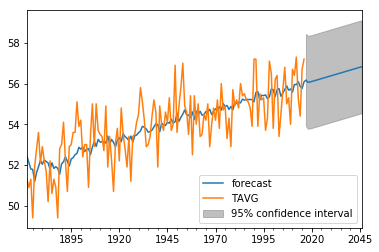

In [115]:
# Forecast interest rates using an AR(1) model
mod = ARIMA(temp_NY, order=(1,1,1))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start='1872-01-01', end='2046-01-01')
plt.show()